In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

In [52]:
data = pd.read_csv('./html2023-spring-final-project/train.csv')

In [53]:
data.head(1)

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Licensed,official_video,id,Track,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
0,0.0,0.000273,3.0,-25.176,0.0443,0.724151,0.000062,0.000807,0.34,83.398,117907.0,NaN,137622.0,19981370.0,album,False,False,0,NaN,Sinkovsky Plays and Sings Vivaldi,spotify:track:7njAZhca4o80qQdCgyEWya,https://open.spotify.com/artist/2QOIawHpSlOwXD...,https://www.youtube.com/watch?v=NzCL9uLkQSI,3070.0,Antonio Vivaldi's 4th Concerto - From his Most...,"Antonio Vivaldi - Concerto No.4 in F minor, Op...",Mozafunkula,NaN,Marshmello


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17170 entries, 0 to 17169
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Danceability      17170 non-null  float64
 1   Energy            14615 non-null  float64
 2   Key               14568 non-null  float64
 3   Loudness          14601 non-null  float64
 4   Speechiness       14655 non-null  float64
 5   Acousticness      14593 non-null  float64
 6   Instrumentalness  14569 non-null  float64
 7   Liveness          14635 non-null  float64
 8   Valence           14596 non-null  float64
 9   Tempo             14608 non-null  float64
 10  Duration_ms       14567 non-null  float64
 11  Views             14574 non-null  float64
 12  Likes             14591 non-null  float64
 13  Stream            14602 non-null  float64
 14  Album_type        14610 non-null  object 
 15  Licensed          14577 non-null  object 
 16  official_video    14555 non-null  object

### Drop Uri, Url_spotify, Url_youtube

In [55]:
data.drop(['Uri','Url_spotify', 'Url_youtube'], axis=1, inplace=True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17170 entries, 0 to 17169
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Danceability      17170 non-null  float64
 1   Energy            14615 non-null  float64
 2   Key               14568 non-null  float64
 3   Loudness          14601 non-null  float64
 4   Speechiness       14655 non-null  float64
 5   Acousticness      14593 non-null  float64
 6   Instrumentalness  14569 non-null  float64
 7   Liveness          14635 non-null  float64
 8   Valence           14596 non-null  float64
 9   Tempo             14608 non-null  float64
 10  Duration_ms       14567 non-null  float64
 11  Views             14574 non-null  float64
 12  Likes             14591 non-null  float64
 13  Stream            14602 non-null  float64
 14  Album_type        14610 non-null  object 
 15  Licensed          14577 non-null  object 
 16  official_video    14555 non-null  object

In [18]:
data['Key'].unique()

array([ 3.,  7.,  6., nan,  5., 10.,  1.,  2.,  0.,  4.,  8.,  9.])

In [21]:
data['Artist'].unique()

array(['Marshmello', 'Bon Iver', 'Kamasi Washington', 'Drake',
       'Alicia Keys', 'Major Lazer', 'J. Cole', 'Flume', 'Tame Impala',
       nan, 'Chance the Rapper', 'Kanye West', 'deadmau5', 'Rihanna',
       'Dua Lipa', 'The Chainsmokers', 'Billie Eilish', 'Soccer Mommy',
       'Sufjan Stevens', 'Parquet Courts', 'Phoebe Bridgers',
       'Mac DeMarco', 'Disclosure', 'Tyler, The Creator', 'Black Midi',
       'Charli XCX', 'Julien Baker', 'Grimes', 'Pharrell Williams',
       'Khruangbin', 'Alt-J', 'The 1975', 'Vampire Weekend', 'Halsey',
       'Big Thief', 'Justin Bieber', 'Robyn', 'Shawn Mendes', 'Mitski',
       'Anderson .Paak', 'Angel Olsen', 'Fontaines D.C.', 'Justice',
       'Skrillex', 'Swedish House Mafia', 'Kurt Vile', 'Travis Scott',
       'The Weeknd', 'Avicii', 'SZA', 'FKA twigs', 'Jay-Z', 'Lizzo',
       'Cardi B', 'Moses Sumney', 'Carly Rae Jepsen', 'Foals',
       'David Guetta', 'Bruno Mars', 'King Gizzard & The Lizard Wizard',
       'Lorde', 'St. Vincent', 'L

In [35]:
len(data['Artist'].unique())

97

### Album type

In [23]:
data['Album_type'].unique()

array(['album', nan, 'single', 'compilation'], dtype=object)

### Composer

In [24]:
data['Composer'].unique()

array([nan, "Finneas O'Connell", 'Louis Bell', 'Juicy J',
       'Noah "40" Shebib', 'Mike Dean', 'Yeti Beats', 'Terrace Martin',
       'Ludwig Göransson', 'Ricky Reed', 'J. Cole'], dtype=object)

In [26]:
len(data['Composer'].unique())

11

### Channel

In [25]:
data['Channel'].unique()

array(['Mozafunkula', 'Anton Paisov', 'robbiewilliamsvevo', ...,
       'LE SSERAFIM', 'Kpop Cloud', 'SICK LEGEND - Topic'], dtype=object)

In [27]:
len(data['Channel'].unique())

5191

#### "Licensed" mostly similar to "official_video"

In [ ]:
data

### Grouped by "Composer"

In [57]:
sorted_df = data.sort_values('Danceability')
sorted_df.to_excel('Danceability.xlsx', index=False)
# grouped.to_excel('output.xlsx', index=False)

c:\Users\Miguel\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:1170: UserWarning: Ignoring URL 'https://jimmieallen.lnk.to/bettiejamesgold

Connect%20with%20Jimmie:
%20
https://www.jimmieallenmusic.com/
https://www.facebook.com/jimmieallenmusic/
https://www.instagram.com/jimmieallen/
https://twitter.com/JimmieAllen
%20
Subscribe%20to%20Jimmie’s%20channel%20here:%20https://jimmieallen.lnk.to/ytchnlsubscribe
%20
LYRICS:%20
%20SUNSET%20THROUGH%20A%20WINDSHIELD%20I%20CAN%20SEE%20IT%20NOW
LIKE%20A%20PICTURE%20IN%20A%20FRAME%20
BLUE%20JEANS%20AND%20T-SHIRTS%20-%20WHO%20WE%20WERE,%20WE%20WORE%20IT%20LIKE%20A%20NAME
I%20WISH%20I%20COULD%20GO%20BACK%20TO%20THOSE%20DAYS%20WHEN
%20
THAT%20TOWN%20WAS%20THE%20WHOLE%20WORLD%20-%20LOVE%20WAS%20THE%20GIRL%20NEXT%20DOOR%20
SOUNDTRACK%20WAS%20A%20SONG%20IN%20THE%20DARK
I%20MISS%20THOSE%20DAYS%20WHEN%20OUR%20DREAMS%20WERE%20THERE%20FOR%20CHASIN'
BUT%20TIME%20WAS%20BETTER%20WASTED
WE%20WERE%20SUMMER%20YOUNG%20AND%20LIVIN'%20FOR%20A%20FRIDAY
AND%20FRE

In [64]:
numericData= sorted_df.iloc[:, 0:13]

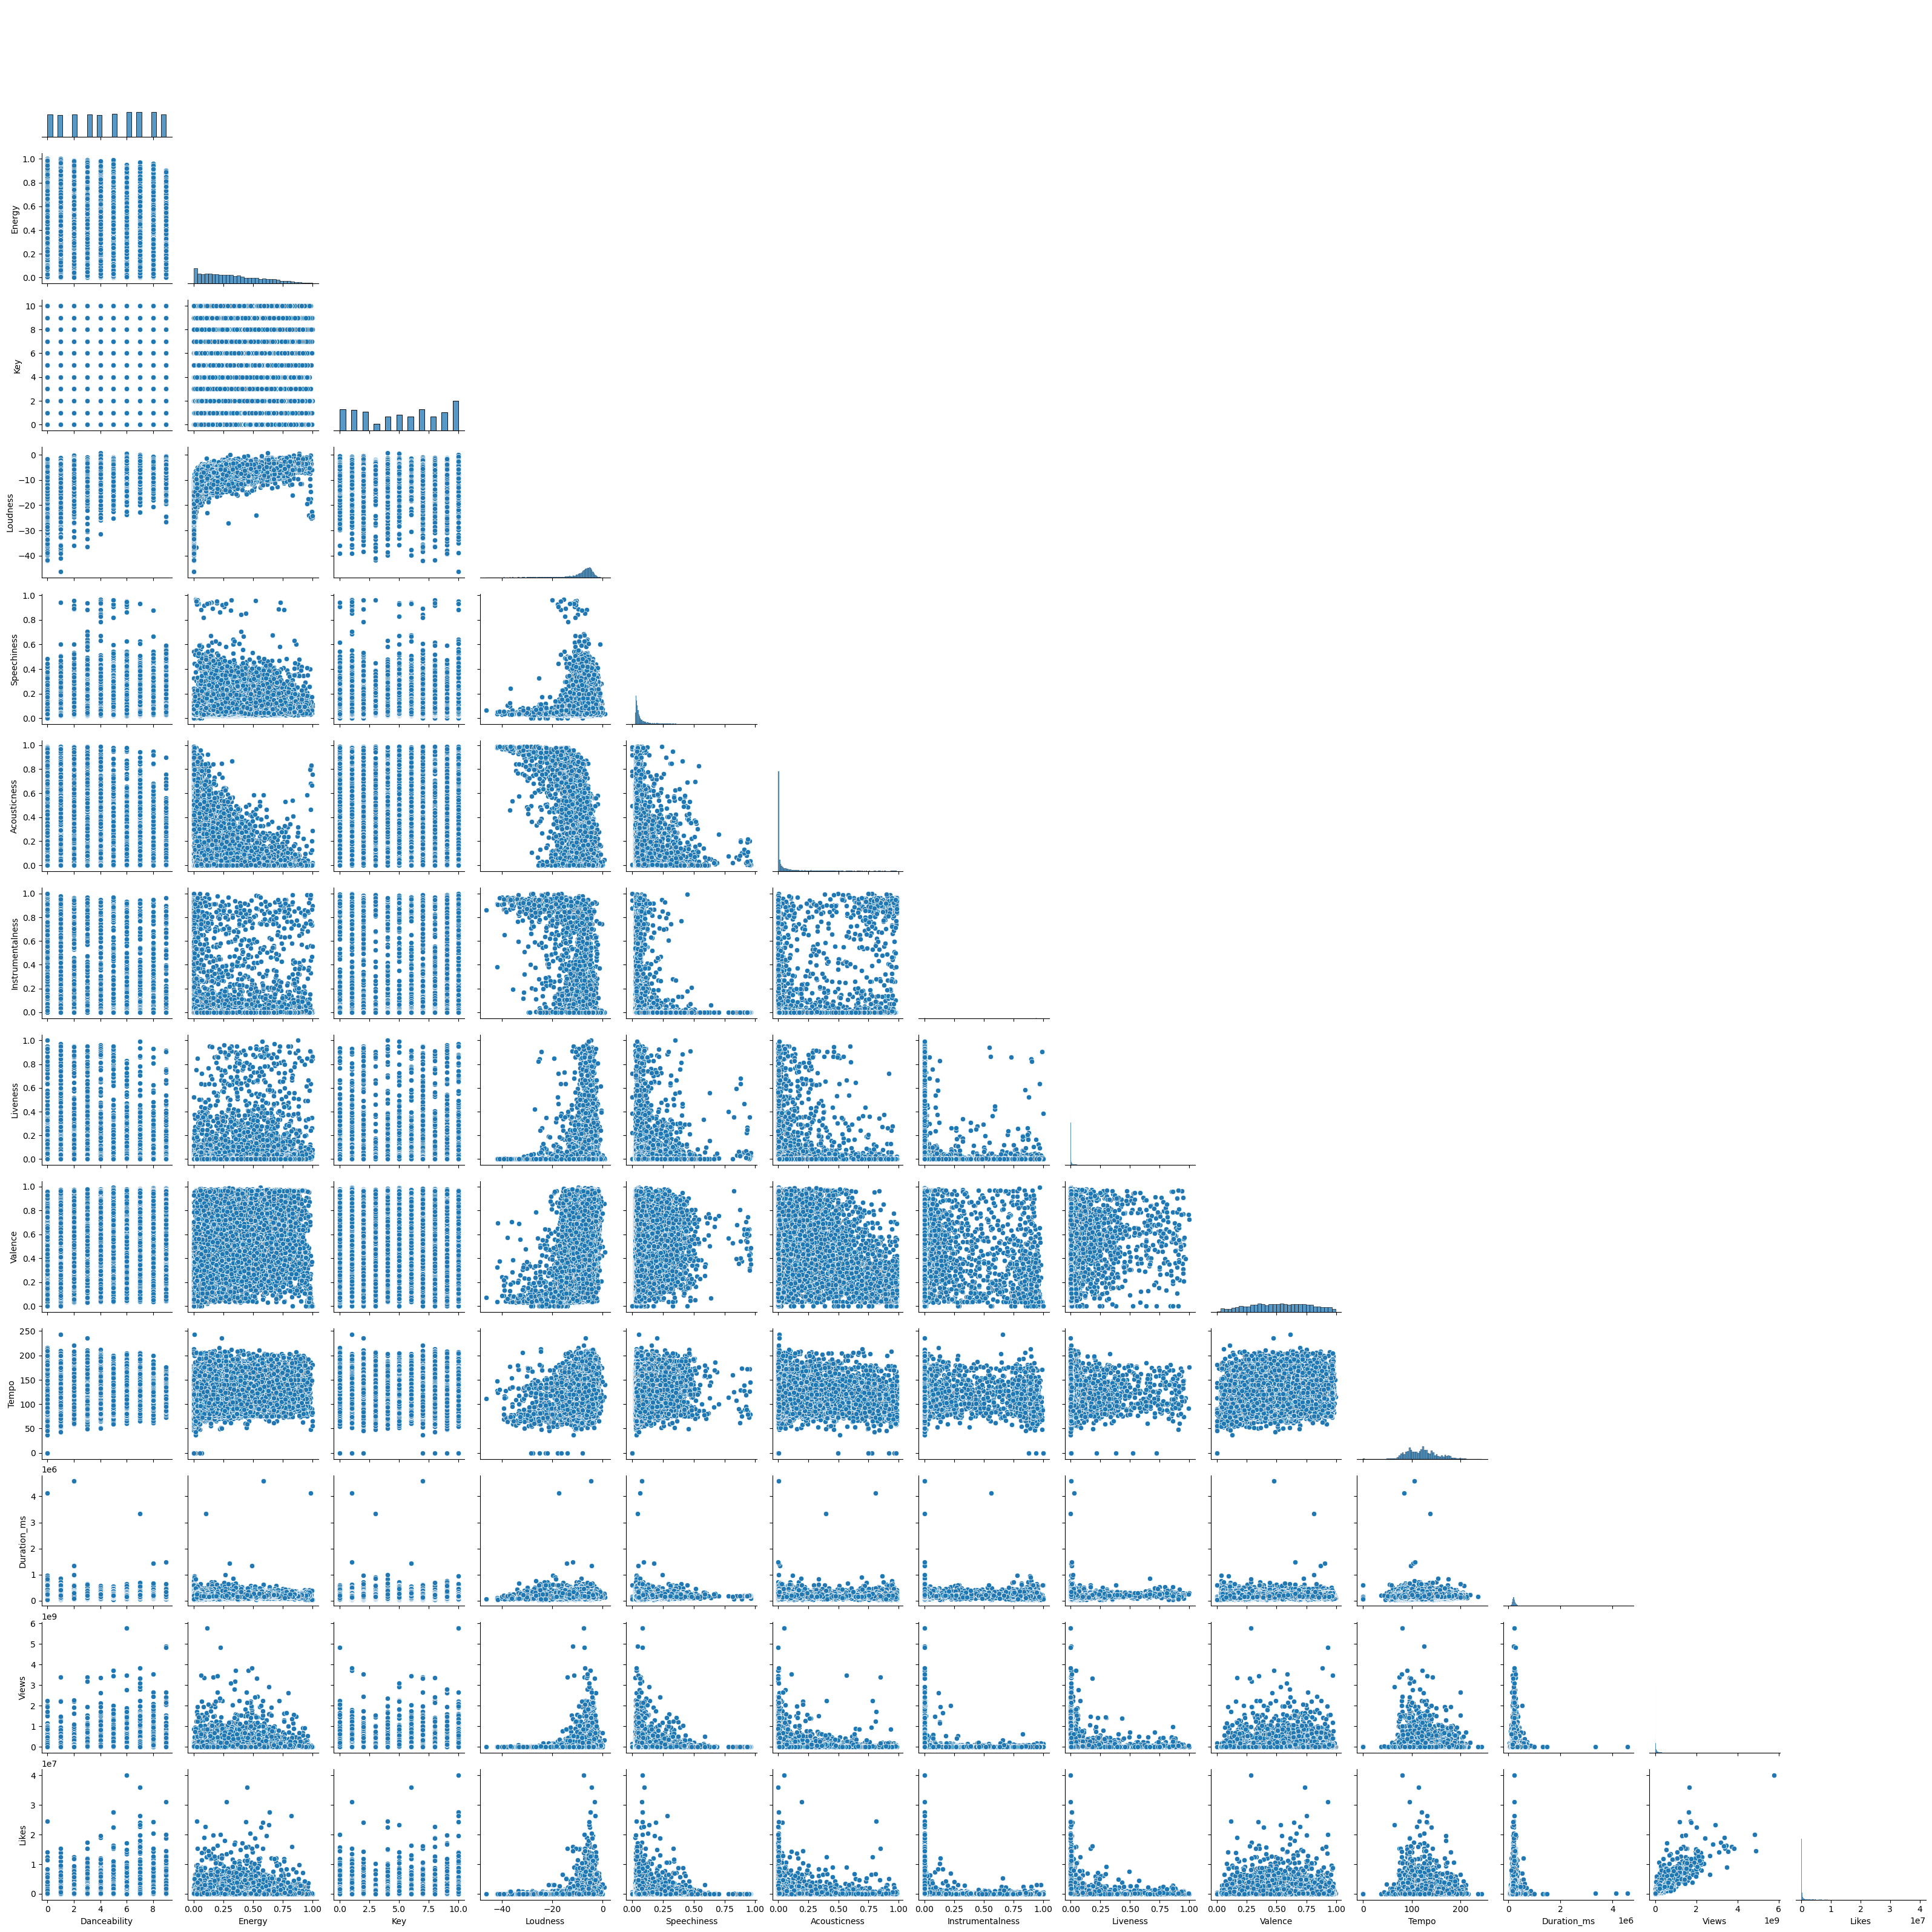

In [71]:
sns.pairplot(numericData, corner=True)


In [7]:
data.isnull().sum()

Danceability           0
Energy              2555
Key                 2602
Loudness            2569
Speechiness         2515
Acousticness        2577
Instrumentalness    2601
Liveness            2535
Valence             2574
Tempo               2562
Duration_ms         2603
Views               2596
Likes               2579
Stream              2568
Album_type          2560
Licensed            2593
official_video      2615
id                     0
Track               2562
Album               2585
Uri                 2564
Url_spotify         2591
Url_youtube         2529
Comments            2581
Description         2604
Title               2623
Channel             2558
Composer            2558
Artist              2566
dtype: int64

In [8]:
data[data["Artist"]=="Dua Lipa"]

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Stream,Album_type,Licensed,official_video,id,Track,Album,Uri,Url_spotify,Url_youtube,Comments,Description,Title,Channel,Composer,Artist
17,1.0,0.000340,6.0,-16.827,NaN,9.732423e-01,0.103000,0.001295,0.2320,105.202,187373.0,9236037.0,62809.0,29325998.0,album,True,True,17,The Great Escape,Close to Paradise,spotify:track:1GIPP103zfsythULEpsmdw,https://open.spotify.com/artist/7bPs6jf983f0bj...,https://www.youtube.com/watch?v=YA2h9PrIUxs,2114.0,Subscribe to Patrick Watson on Youtube: https:...,Patrick Watson - The Great Escape (Official Vi...,Secret City Records,Finneas O'Connell,Dua Lipa
21,1.0,0.013312,6.0,-14.936,0.0334,7.660609e-01,0.807000,0.001861,0.0820,117.069,217606.0,706018.0,7201.0,19457528.0,NaN,NaN,True,21,Love Songs For Robots,Love Songs For Robots,spotify:track:3VtlSKbs0IjVeeRV4otHNT,https://open.spotify.com/artist/7bPs6jf983f0bj...,https://www.youtube.com/watch?v=lCskw1901a0,167.0,NaN,Patrick Watson - Love Songs For Robots (Offici...,Domino Recording Co.,"Noah ""40"" Shebib",Dua Lipa
220,0.0,0.307547,1.0,NaN,0.0472,2.733594e-01,0.000000,0.000893,0.4960,177.053,259360.0,52999310.0,235985.0,41143460.0,album,NaN,True,220,NaN,Sen Ağlama,spotify:track:2rP7pI2WpMWcUraYAX2xiT,https://open.spotify.com/artist/64d1rUxfizSAOE...,https://www.youtube.com/watch?v=Eg6gKLXA30U,12946.0,Sezen Aksu - Tükeneceğiz\n\nSöz: Sezen Aksu\nB...,NaN,Sezen Aksu,NaN,Dua Lipa
304,1.0,0.952764,1.0,-3.783,0.0939,2.352637e-12,0.000224,NaN,0.0368,NaN,175760.0,40252033.0,236069.0,NaN,album,True,True,304,The Fight Song,Holy Wood,NaN,https://open.spotify.com/artist/2VYQTNDsvvKN9w...,https://www.youtube.com/watch?v=9GFI6Rf-IkI,NaN,Best of Marilyn Manson: https://goo.gl/5Z3C5t\...,Marilyn Manson - The Fight Song (Official Musi...,NaN,NaN,Dua Lipa
306,0.0,0.873723,10.0,NaN,0.1850,NaN,0.016100,0.150569,0.2710,134.083,181507.0,29836483.0,200242.0,32575568.0,album,True,True,306,Disposable Teens,Holy Wood,spotify:track:07YoPdPfhQ62iNztZvOlDY,https://open.spotify.com/artist/2VYQTNDsvvKN9w...,https://www.youtube.com/watch?v=GKkiCFOE-Ic,9048.0,Best of Marilyn Manson: https://goo.gl/5Z3C5t\...,Marilyn Manson - Disposable Teens (Official Mu...,NaN,NaN,Dua Lipa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16966,1.0,0.395447,6.0,-9.750,0.0374,5.594762e-16,NaN,0.179406,0.5450,178.182,166996.0,378925.0,10822.0,6523152.0,single,False,True,16966,Take Me To The Sun,Take Me To The Sun,spotify:track:32GHYtVVAsYNQGafHrrRxv,https://open.spotify.com/artist/5y8tKLUfMvliMe...,https://www.youtube.com/watch?v=vl1FGKTyXR0,244.0,"""Take Me To The Sun"" available now - https://d...",d4vd - Take Me To The Sun (Official Visualizer...,d4vd,Juicy J,Dua Lipa
16994,1.0,0.738763,9.0,-1.224,0.0420,NaN,0.000010,0.001816,NaN,143.884,199210.0,6099477.0,NaN,10739685.0,album,False,True,16994,Respeita Seu Ex,Quando Tem Sentimento,spotify:track:2ryeIBjDGoVmvK45BmFXpM,https://open.spotify.com/artist/0BHm7qbh3ENxvX...,https://www.youtube.com/watch?v=63cC7YAed_M,1096.0,Vídeo oficial da música “Respeita Seu Ex” de M...,Mari Fernandez e @MuriloHuff - RESPEITA SEU EX...,Mari Fernandez,NaN,Dua Lipa
17013,9.0,0.234885,1.0,-8.497,0.1400,1.169708e-02,0.003060,0.000236,0.8100,125.605,NaN,6968852.0,NaN,261766891.0,album,False,False,17013,Pain,to hell with it,spotify:track:4S4QJfBGGrC8jRIjJHf1Ka,NaN,https://www.youtube.com/watch?v=lw_XFnk5kwU,4716.0,here’s a full version of the song! so here’s t...,PinkPantheress - Pain,Pinkpantheress,Mike Dean,Dua Lipa
17088,1.0,0.267090,NaN,-7.503,0.0775,1.860867e-03,0.000000,0.001331,0.2740,113.884,260339.0,2229028.0,67984.0,1949340.0,album,True,True,17088,O Tempo É Professor,Vida Cara,spotify:track:0IDrhhTieZacVGhcWEl3bL,https://open.spotify.com/artist/4yGgbQJMq9orWy...,NaN,1671.0,Ouça #VIDACARA em todas as plataformas digitai...,"Orochi ""O Tempo é Professor"" feat. Mvk Oruam ..

### Data

- **Track**: name of the song, as visible on the Spotify platform.

- **Artist**: name of the artist.

- **Composer**: name of the composer

- **Url_spotify**: the Url of the artist.

- **Album**: the album in wich the song is contained on Spotify.

- **Album_type**: indicates if the song is relesead on Spotify as a single or contained in an album.

- **Uri**: a spotify link used to find the song through the API.

- **Energy**: is a measure from 0.0 to 1.0 and represents a perceptual measure of <u>intensity</u> and <u>activity</u>. 
Typically, energetic tracks <u>feel fast, loud, and noisy</u>. 

For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include <u>dynamic range, perceived loudness, timbre, onset rate, and general entropy.</u>

Categorical
- **Key**: the key the track is in. 

Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

- **Loudness**: the overall loudness of a track in decibels (dB). 
Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

- **Speechiness**: detects the presence of spoken words in a track. 
The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. 

<u>Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</u>

- **Acousticness**: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **Instrumentalness**: predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. 
Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- **Liveness**: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- **Valence**: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 

Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **Tempo**: the overall estimated tempo of a track in beats per minute (BPM). 

In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- **Duration_ms**: the duration of the track in milliseconds.

- **Stream**: number of streams of the song on Spotify.

- **Url_youtube**: url of the video linked to the song on Youtube, if it have any.

- **Title**: title of the videoclip on youtube.

- **Channel**: name of the channel that have published the video.

- **Views**: number of views.

- **Likes**: number of likes.

- **Comments**: number of comments.

- **Description**: description of the video on Youtube.

- **Licensed**: Indicates whether the video represents licensed content, which means that the content was uploaded to a channel linked to a YouTube content partner and then claimed by that partner.

- **official_video**: boolean value that indicates if the video found is the official video of the song.

Fill null key with 11 --> It can be treated as categorical or label
Fill description, comment, Title, Composer, Artist with ""

In [9]:
data['Key'] = data['Key'].fillna(11)
data['Comments'] = data['Comments'].fillna("")
data['Description'] = data['Description'].fillna("")
data['Title'] = data['Title'].fillna('')
data['Composer'] = data['Composer'].fillna('')
data['Artist'] = data['Artist'].fillna('')
data['Channel'] = data['Channel'].fillna('')
data.isnull().sum()

Danceability           0
Energy              2555
Key                    0
Loudness            2569
Speechiness         2515
Acousticness        2577
Instrumentalness    2601
Liveness            2535
Valence             2574
Tempo               2562
Duration_ms         2603
Views               2596
Likes               2579
Stream              2568
Album_type          2560
Licensed            2593
official_video      2615
id                     0
Track               2562
Album               2585
Uri                 2564
Url_spotify         2591
Url_youtube         2529
Comments               0
Description            0
Title                  0
Channel                0
Composer               0
Artist                 0
dtype: int64

In [133]:
data['Artist'].unique()

array(['Marshmello', 'Bon Iver', 'Kamasi Washington', 'Drake',
       'Alicia Keys', 'Major Lazer', 'J. Cole', 'Flume', 'Tame Impala',
       nan, 'Chance the Rapper', 'Kanye West', 'deadmau5', 'Rihanna',
       'Dua Lipa', 'The Chainsmokers', 'Billie Eilish', 'Soccer Mommy',
       'Sufjan Stevens', 'Parquet Courts', 'Phoebe Bridgers',
       'Mac DeMarco', 'Disclosure', 'Tyler, The Creator', 'Black Midi',
       'Charli XCX', 'Julien Baker', 'Grimes', 'Pharrell Williams',
       'Khruangbin', 'Alt-J', 'The 1975', 'Vampire Weekend', 'Halsey',
       'Big Thief', 'Justin Bieber', 'Robyn', 'Shawn Mendes', 'Mitski',
       'Anderson .Paak', 'Angel Olsen', 'Fontaines D.C.', 'Justice',
       'Skrillex', 'Swedish House Mafia', 'Kurt Vile', 'Travis Scott',
       'The Weeknd', 'Avicii', 'SZA', 'FKA twigs', 'Jay-Z', 'Lizzo',
       'Cardi B', 'Moses Sumney', 'Carly Rae Jepsen', 'Foals',
       'David Guetta', 'Bruno Mars', 'King Gizzard & The Lizard Wizard',
       'Lorde', 'St. Vincent', 'L

 ### IMPORTANT DATASET
 0   **Danceability**      <br>
 1   **Energy**            <br>
 2   **Key**               Categorical <br>
 3   **Loudness**          <br>
 4   **Speechiness**       <br>
 5   **Acousticness**      <br>
 6   **Instrumentalness**  <br>
 7   **Liveness**          <br>
 8   **Valence**           <br>
 9   **Tempo**             <br>
 10  **Duration_ms**       <br>

### Get Numerical Data

In [29]:
dataNew = data[["Danceability", "Energy", "Key", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_ms"]].copy()

In [32]:
dataNew.dropna(inplace=True)
dataNew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378 entries, 0 to 17169
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Danceability      3378 non-null   float64
 1   Energy            3378 non-null   float64
 2   Key               3378 non-null   float64
 3   Loudness          3378 non-null   float64
 4   Speechiness       3378 non-null   float64
 5   Acousticness      3378 non-null   float64
 6   Instrumentalness  3378 non-null   float64
 7   Liveness          3378 non-null   float64
 8   Valence           3378 non-null   float64
 9   Tempo             3378 non-null   float64
 10  Duration_ms       3378 non-null   float64
dtypes: float64(11)
memory usage: 316.7 KB


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

### Predict Energy

In [110]:
y = dataNew['Energy'] 
X = dataNew[dataNew.columns[~dataNew.columns.isin(['Energy'])]]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [112]:
X_trainNoKey =  X_train[X_train.columns[~X_train.columns.isin(['Key'])]]
X_testNoKey = X_test[X_test.columns[~X_test.columns.isin(['Key'])]]

In [113]:
scalerEnergy = StandardScaler()
scaledEnergyTrain = scalerEnergy.fit_transform(X_trainNoKey)
scaledEnergyTest = scalerEnergy.transform(X_testNoKey)

In [115]:
# Key ---> last column
X_trainD = np.concatenate((scaledEnergyTrain, X_train['Key'].to_numpy().reshape(len(X_train), 1)), axis= 1)
X_testD = np.concatenate((scaledEnergyTest, X_test['Key'].to_numpy().reshape(len(X_test), 1)), axis= 1)

In [119]:
svrEnergy = SVR()
svrEnergy.fit(X_trainD, y_train)
y_pred = svrEnergy.predict(X_testD)
MSE = np.mean((y_pred - y_test)**2)
MSE

0.02429438491172579